<a href="https://colab.research.google.com/github/warwintryborn/airbnd_data_analysis/blob/master/Airbnb_Data_Analysis_(Crete).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Airbnb Data Analysis - Crete

The [Airbnb](https://www.airbnb.com/) it's considered one of the biggest hotel companies in the world and it's impressive the company **doesn't have any hotel**.


The business model is to make an intermediary way between the local hotel/room owner and the host/traveler.


In addition to the main work model, they provide its data from your website [Inside Airbnb](http://insideairbnb.com/get-the-data.html) and with this you can download a large number os datas for develop project and solutions to Data Science

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**On this *notebook*, we'll analyze the datas from Crete - Greece and watch what insights we can extract from the raw data**

# Getting the Data

All the data was getting from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) 

For this analyze we'll download just this file:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*




In [ ]:
# import the libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# import the file for DataFrame

df = pd.read_csv("http://data.insideairbnb.com/greece/crete/crete/2020-05-28/visualisations/listings.csv")

# Data Analyze

Attributes(Variables) from the data

* `id`
* `name`
* `host_id`
* `host_name`
* `neighbourhood_group`
* `neighbourhood`
* `latitude`
* `longitude`
* `room_type`
* `price`
* `minimum_nights`
* `number_of_reviews`
* `last_review`
* `reviews_per_month`
* `calculated_host_listings_count`
* `availability_365`

In [ ]:
# show the first 5 entries from the data

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,27966,Heraklion-Pinelopi Apartment,120502,Antonia & Manolis,NaN,Μαλεβιζίου,35.33198,25.08182,Entire home/apt,45,2,500,2020-03-06,5.25,2,0
1,28970,artists' house in the old town,124670,Eirini,NaN,Ηρακλείου,35.34005,25.12809,Entire home/apt,70,1,52,2017-10-16,0.44,2,85
2,29856,Matala Dimitris Villa and Hotel,128653,Dimitris,NaN,Φαιστού,34.99311,24.74964,Private room,50,1,40,2019-10-13,0.34,2,204
3,30162,"2 storey Loft in Heraklion, Crete",59966,Nicole,NaN,Ηρακλείου,35.34090,25.13154,Entire home/apt,190,2,18,2018-08-27,0.22,3,363
4,31023,Guesthouse Chryssoula Room No1,133208,Chryssoula,NaN,Χανίων,35.51591,24.01751,Entire home/apt,40,2,262,2020-03-19,2.74,4,268


## **Q1. How many attributes (variables) and how many entries does our data set have? What are the types of variables?**

This * dataset * we downloaded is the "short" version of Airbnb. On the same page we downloaded the file `listings.csv`. There is a more complete version with 35847 entries and 106 variables (`listings.csv.gz`).

In [ ]:
# identify the data volume of the DataFrame
print("Entries:\t {}".format(df.shape[0]))
print("Attributes:\t {}".format(df.shape[1]))

# verify the first 5 dataset entries
display(df.dtypes)

Entries:	 18391
Attributes:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **Q2. What is the percentage of missing values in the dataset?**

The * dataset * quality is directly related to the amount of missing values. It is important to understand early on whether these null values are significant compared to the total entries.

* You can see that the column `neighborhood_group` has 100% of its missing values.
* The `reviews_per_month` and` last_review` variables have null values in almost half of the lines.
* The `name` and` host_name` variables have approximately 0.1% of the null values.

In [ ]:
# desc order the attributes by your null values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.322658
last_review                       0.322658
name                              0.000272
host_name                         0.000054
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## **Q3. What is the type of distribution of the variables?**

To identify the distribution of variables, I will plot the histogram.

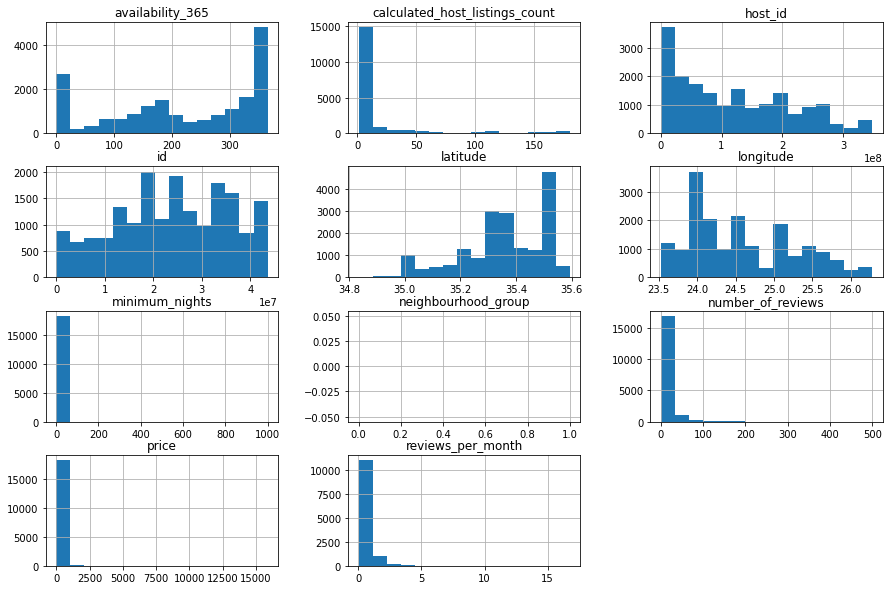

In [ ]:
# histogram plot for numeric attributes
df.hist(bins=15, figsize=(15,10));

## **Q4. Are there outliers present?**

By distributing the histogram, it is possible to verify the presence of * outliers *. Take for example the variables `price`,` minimum_nights` and `calculated_host_listings_count`.

Values do not follow a distribution, and distort the entire graphic representation. To confirm, there are two quick ways to help detect * outliers *. Are they:

* Statistical summary using the `describe ()` method
* Plot `boxplots` for the variable.

In [ ]:
# estastic brief for numeric variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18391.000000,18391.000000,18391.000000,12457.000000,18391.000000,18391.000000
mean,129.575118,3.316731,10.629493,0.514948,15.836387,217.991572
std,251.270661,10.006127,21.906536,0.663972,35.750821,128.046642
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,2.000000,0.000000,0.120000,1.000000,124.000000
50%,75.000000,3.000000,3.000000,0.300000,3.000000,234.000000
75%,135.000000,4.000000,12.000000,0.640000,8.000000,343.000000
max,15870.000000,1000.000000,500.000000,16.760000,180.000000,365.000000


Looking the above brief, we can confirm some hypotheses such as:

* The attribute `price` has 75% of the value below 135, however its maximum value is 15870.
* The minimum number of nights (`minimum_nights`) is over 365 days a year.

#### Boxplot for minimum_nights


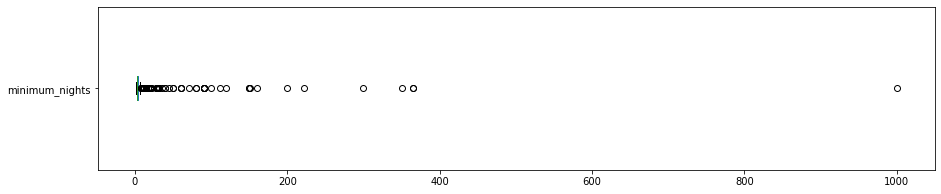

minimum_nights: values over 30:
34 entries
0.1849%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# see amount of amounts over 30 days for minimum_nights
print("minimum_nights: values over 30:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot for price

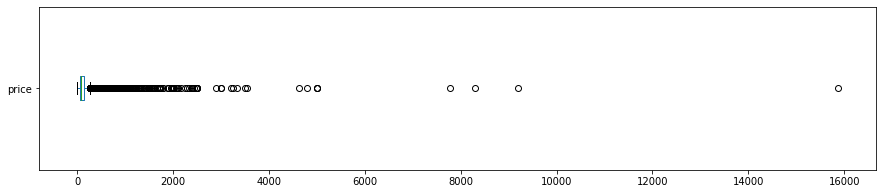


price: valores over 150
3757 entradas
20.4285%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# see quantity of values above 150 for price
print("\nprice: valores over 150")
print("{} entradas".format(len(df[df.price > 150])))
print("{:.4f}%".format((len(df[df.price > 150]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### Histograms without outliers

Since we identified  *outliers* in the `price` and` minimum_nights` variables, we will now clear their *DataFrame* and plot the histogram again.

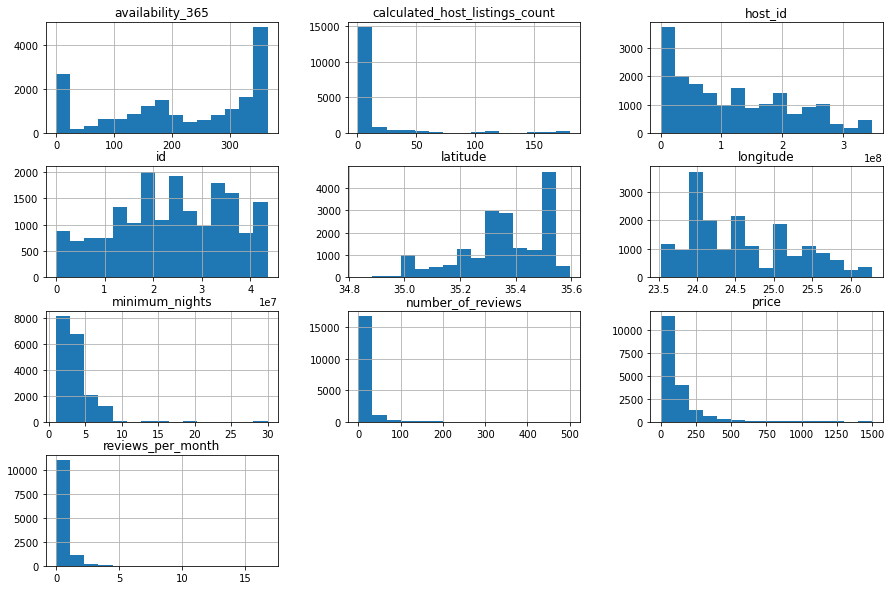

In [ ]:
# remove the *outliers* in a new DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove `neighbourhood_group`, because is empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plot the histogram for the new variables
df_clean.hist(bins=15, figsize=(15,10));

## **Q5. What is the correlation between the variables**

Correlation means that there is a relationship between two things. In our context, we are looking for a relationship or similarity between two variables.

This relationship can be measured, and it is a function of the correlation coefficient to establish its intensity. To identify the correlations between the variables of interest, I will:

* Create a correlation matrix
* Generate a * heatmap * from this matrix, using the `seaborn` library

In [ ]:
# create correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.203562,-0.166218,-0.184733,0.277932,0.020730
minimum_nights,0.203562,1.000000,-0.079413,-0.133291,0.212686,-0.048160
number_of_reviews,-0.166218,-0.079413,1.000000,0.788882,-0.107392,0.039197
reviews_per_month,-0.184733,-0.133291,0.788882,1.000000,-0.130728,0.020582
calculated_host_listings_count,0.277932,0.212686,-0.107392,-0.130728,1.000000,0.023252
availability_365,0.020730,-0.048160,0.039197,0.020582,0.023252,1.000000


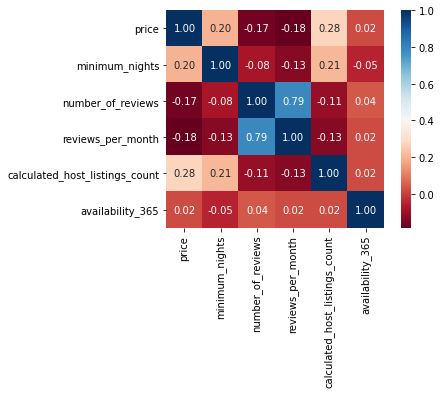

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## **Q6. What type of property is most rented on Airbnb?**

The column of the variable `room_type` indicates the type of rental that is advertised on Airbnb. If you have already rented on the website, you know that there are options for apartments / entire houses, just renting a room or even sharing a room with other people.

Let's count the number of occurrences of each type of rental, using the `value_counts ()` method.

In [ ]:
# show the amount of each immobile type available
df_clean.room_type.value_counts()

Entire home/apt    16137
Private room        1537
Hotel room           607
Shared room           12
Name: room_type, dtype: int64

In [ ]:
# show the average of each immobile type available
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.882141
Private room       0.084021
Hotel room         0.033182
Shared room        0.000656
Name: room_type, dtype: float64

## **Q7. What is the most expensive location in C?**

One way to check one variable against another is to use `groupby ()`. In this case, we want to compare `neighborhoods`  from the rental price.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Αποκορώνου        160.129032
Αγίου Νικολάου    156.374874
Πλατανιά          146.383038
Μυλοποτάμου       139.721881
Ρεθύμνης          135.822430
Μαλεβιζίου        130.428380
Κισσάμου          122.582794
Χανίων            119.764031
Ιεράπετρας        107.889213
Χερσονήσου        102.316610
Name: price, dtype: float64

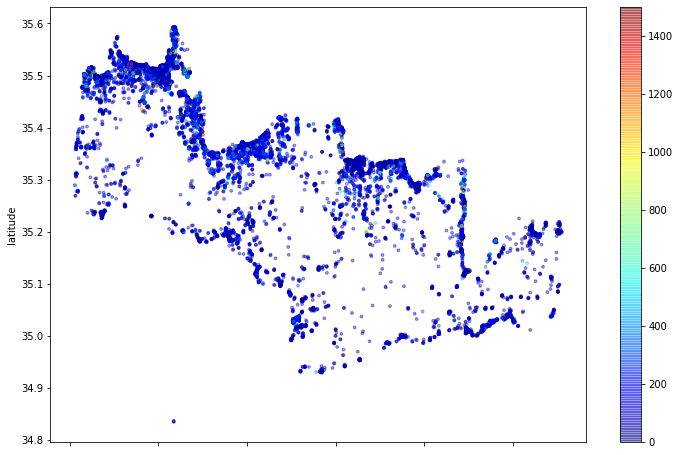

In [ ]:
# latitude and longitude plot
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Q8. What is the average minimum rental night (minimum_nights)?**

With the information from DataFrame, we also can see what is the average from minimum rental night you can rent in a place at Crete.

In [ ]:
# show the average minimum rental night
df_clean.minimum_nights.mean()

3.0476685070792104

# **Conclusions**

Was only made a superficial analyze using the dataset from Airbnb and we can see there is some outliners in the datas and this can distorce the analyze.

But even so with this succint dataset we can draw some conclusions to make better decisions about where we can go.

This analysis was done with data from Crete at Greece, but we can do other analysis with any location you want to visit from the information provided by Airbnb.

